# 1.) Pull in Data and Convert ot Monthly

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]

[*********************100%%**********************]  1 of 1 completed


# 2.) Create columns. 
  - Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [3]:
df

,Adj Close
Date,
1980-12-31,0.117887
1981-01-31,0.097591
1981-02-28,0.091546
1981-03-31,0.084637
1981-04-30,0.098023
...,...
2023-09-30,170.984741
2023-10-31,170.545319
2023-11-30,189.949997


In [4]:
# Difference in stockprice
df["Diff"] = df["Adj Close"].diff().shift(-1)

# Target up or down
df["Target"] = np.sign(df["Diff"])

# Option Premium
df["Premium"] = .08 * df["Adj Close"]

In [5]:
df.head()

,Adj Close,Diff,Target,Premium
Date,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431
1981-01-31,0.097591,-0.006045,-1.0,0.007807
1981-02-28,0.091546,-0.006909,-1.0,0.007324
1981-03-31,0.084637,0.013386,1.0,0.006771
1981-04-30,0.098023,0.016409,1.0,0.007842


# 3.) Pull in X data, normalize and build a LogReg on column 2

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [7]:
X = pd.read_csv("Xdata.csv", index_col="Date", parse_dates=["Date"])

In [11]:
y = df.loc[:"2023-09-30","Target"].copy()

df = df.loc[:"2023-09-30",:].copy()

In [9]:
logreg = LogisticRegression()

logreg.fit(X, y)

y_pred = logreg.predict(X)

In [10]:
len(y_pred)

514

# 4.) Add columns, prediction and profits.

In [12]:
df["Predictions"] = y_pred

In [22]:
df["Profits"] = 0.

# True Positives
df.loc[(df["Predictions"] == 1) & (df["Target"] == 1), "Profits"] = df["Premium"]

# False Positives
df.loc[(df["Predictions"] == 1) & (df["Target"] == -1), "Profits"] = df["Premium"] + 100 * df["Diff"]

In [24]:
df

,Adj Close,Diff,Target,Premium,Predictions,Profits
Date,,,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431,-1.0,0.000000
1981-01-31,0.097591,-0.006045,-1.0,0.007807,-1.0,0.000000
1981-02-28,0.091546,-0.006909,-1.0,0.007324,-1.0,0.000000
1981-03-31,0.084637,0.013386,1.0,0.006771,1.0,0.006771
1981-04-30,0.098023,0.016409,1.0,0.007842,1.0,0.007842
...,...,...,...,...,...,...
2023-05-31,176.778061,16.675507,1.0,14.142245,1.0,14.142245
2023-06-30,193.453568,2.473389,1.0,15.476285,1.0,15.476285
2023-07-31,195.926956,-8.304138,-1.0,15.674156,-1.0,0.000000


# 5.) Plot profits over time

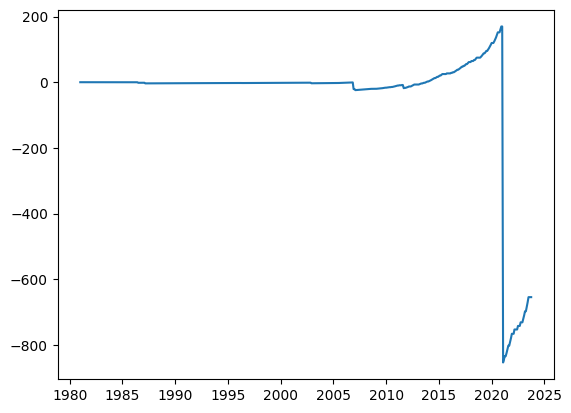

In [23]:
plt.plot(np.cumsum(df["Profits"]))
plt.show()

## 5.5.) Your skills from the MQE to help Mr.Liu's venture

Mr. Liu from Avalanche created a platform called Stars Arena which has the function of a social platform and can realize the profit of KOLs. With the data analysis skills we acquired from MQE courses, we can utilize the data from the Stars Arena and analyze the user's profile of the followers of KOLs, helping the platform to provide service maximizing the KOLs and better developed the platform.

# 6.) Create a loop that stores total profits over time

# 7.) What is the optimal threshold and plot the total profits for this model.